In [26]:
!pip install networkx
!pip install numpy
!pip install matplotlib
!pip install scipy

                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                             0.0/42.5 MB 186.2 kB/s eta 0:03:49
                                             0.0/42.5 MB 186.2 kB/s eta 0:03:49
                                             0.0/42.5 MB 186.2 kB/s eta 0:03:49
                                             0.1/42.5 MB 261.4 kB/s eta 0:02:43
                                             0.1/42.5 MB 261.4 kB/s eta 0:02:43
                                             0.1/42.5 MB 312.9 kB/s eta 0:02:16
                                             0.1/42.5 MB 369.8 kB/s eta 0:01:55
                                             0.1/42.5 MB 369.8 kB/s eta 0:01:55
                                             0.2/42.5 MB 368.6 kB/s eta 0:01:55
                                             0.3/42.5 MB 535.8 k

ERROR: Could not find a version that satisfies the requirement scipy (from versions: none)
ERROR: No matching distribution found for scipy


In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

# utility functions

In [141]:
def calculate_adjacency_eigvals(graph):
    adj_matrix = nx.adjacency_matrix(graph).toarray()
    return np.linalg.eig(adj_matrix)[0]
    
def calculate_laplacian_eigvals(graph):
    laplacian_matrix = nx.laplacian_matrix(graph).toarray() 
    return np.linalg.eig(laplacian_matrix)[0]

def calculate_spectralradius(graph):
    eigenvalues = calculate_adjacency_eigvals(graph)
    eigenvalues.sort()
    return eigenvalues[-1]

def calculate_spectralgap(graph):
    eigenvalues = calculate_adjacency_eigvals(graph)
    eigenvalues.sort()
    print(eigenvalues)
    
    if len(eigenvalues) >= 2:
        return eigenvalues[-1] - eigenvalues[-2]
    return 0

def calculate_algebraic_connectivity(graph):
    eigenvalues = calculate_laplacian_eigvals(graph)
    eigenvalues.sort()
    return eigenvalues[1] # round ?

def calculate_natural_connectivity(graph):
    eigenvalues = calculate_adjacency_eigvals(graph)
    
    eig_sum = 0
    n = len(eigenvalues)
    for eig in eigenvalues:
         eig_sum += math.exp(eig) / n
    
    return np.log(eig_sum)

def calculate_symmetry_ratio(graph):
    d = nx.diameter(graph) or 0
    e = len(set(calculate_adjacency_eigvals(graph)))
    return e / (d+1)

def calculate_energy(graph):
    eigenvalues = calculate_adjacency_eigvals(graph)
    s = 0
    for eig in eigenvalues:
        s += abs(eig)
    
    return s

def calculate_laplacian_energy(graph):
    eigenvalues = calculate_laplacian_eigvals(graph)
    s = 0
    m = graph.number_of_edges()
    n = graph.number_of_nodes()
    for eig in eigenvalues:
        s += abs(eig - (2*m/n))
    
    return s

        

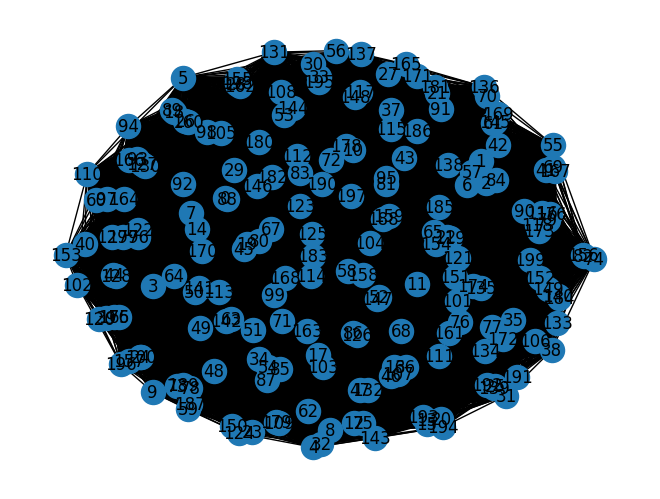

In [149]:
n = 200  # Number of nodes
p = 1 # Probability of an edge between any two nodes

er_graph = nx.gnp_random_graph(n, p)

nx.draw(er_graph, with_labels=True)
plt.show()


[[0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 1]
 [0 1 0 1 0 0 1 0 1 1]
 [1 0 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 0 0 0 1 1]
 [1 1 1 0 0 1 0 1 0 0]
 [0 1 0 1 1 1 1 1 0 0]]

[[ 3  0  0  0  0  0 -1 -1 -1  0]
 [ 0  4  0  0  0 -1  0 -1 -1 -1]
 [ 0  0  2  0  0  0  0 -1 -1  0]
 [ 0  0  0  3  0 -1  0 -1  0 -1]
 [ 0  0  0  0  2  0  0 -1  0 -1]
 [ 0 -1  0 -1  0  5 -1  0 -1 -1]
 [-1  0  0  0  0 -1  3  0  0 -1]
 [-1 -1 -1 -1 -1  0  0  7 -1 -1]
 [-1 -1 -1  0  0 -1  0 -1  5  0]
 [ 0 -1  0 -1 -1 -1 -1 -1  0  6]]


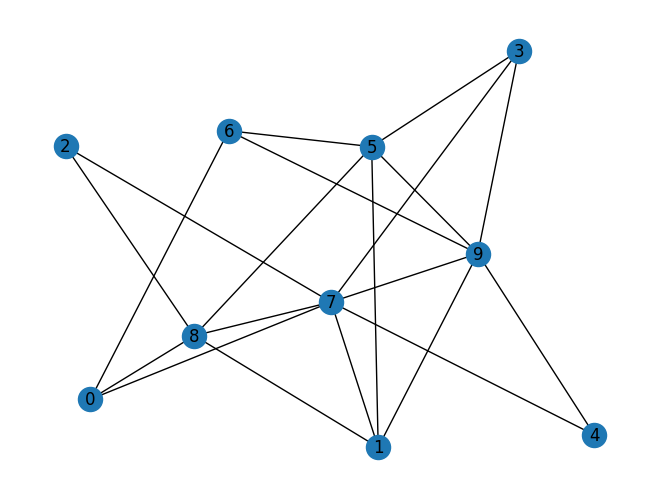

In [33]:
adj_matrix = nx.adjacency_matrix(er_graph).toarray() # ماتریس مجاورت
laplacian_matrix = nx.laplacian_matrix(er_graph).toarray() # ماتریس لاپلاسین

print(adj_matrix, end='\n\n')
print(laplacian_matrix)


nx.draw(er_graph, with_labels=True)
plt.show()

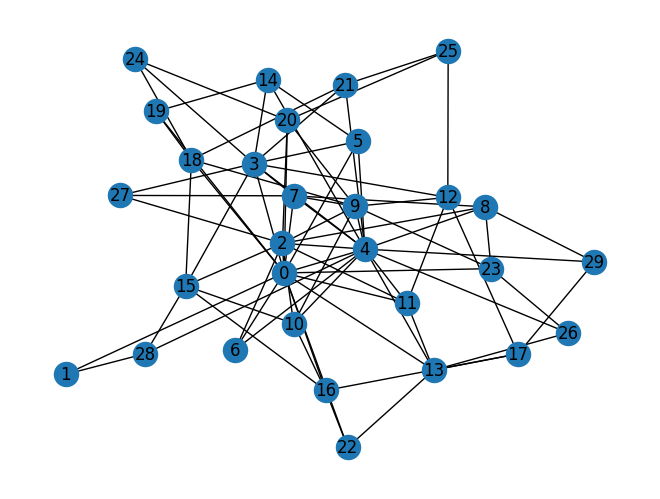

In [163]:
n = 30  # Number of nodes
m = 3 # Number of edges to attach from a new node to existing nodes

# number of centeralized node = n - m

sf_graph = nx.barabasi_albert_graph(n, m)
nx.draw(sf_graph, with_labels=True)
plt.show()


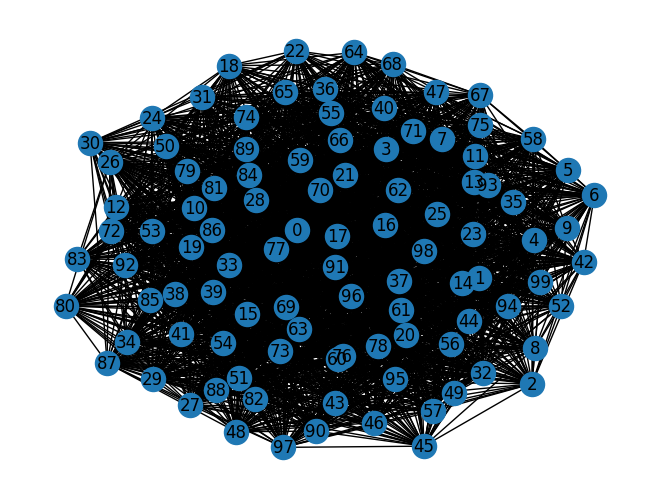

37.36042902853895


In [182]:
n = 100  # Number of nodes
k = 50 # Each node is initially connected to its 4 nearest neighbors
p = 1  # Probability of rewiring each edge

ws_graph = nx.watts_strogatz_graph(n, k, p)

nx.draw(ws_graph, with_labels=True)
plt.show()

laplacian_matrix = nx.laplacian_matrix(ws_graph).toarray() # ماتریس لاپلاسین
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
eigenvalues.sort()
mu2 = eigenvalues[1]

print(mu2)
